# Algoritmo Genético Multimodal

In [1]:
# import import_ipynb
# from algoritmos import *
# 
from ipynb.fs.full.algoritmos import *

In [2]:
def genetico_multimodal(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, radio_nicho, num_nichos, sembrar_greedy, fig, ax):
    
    soluciones = []
    
    for i in range(num_nichos):
        print(i,soluciones)
        with Pool(processes=8) as p:
               soluciones.append(p.starmap(genetico_basico_secuencial, product([semilla], [num_nodos], [distancias], [tam_poblacion], [k_torneo], [tam_cruce], [prob_mutacion], [tam_mutacion], [sembrar_greedy], [soluciones], [radio_nicho]))[0])
        
#         (genetico_basico_secuencial(num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, sembrar_greedy, soluciones, soluciones))
    
    return soluciones
    

## Generación de semillas aleatorias

In [3]:
semilla = random.randint(0,9999999)

## Fichero ch130

geneticoBasico

Fichero: ch130
0 []
1 [23017]
2 [23017, 20953]
3 [23017, 20953, 21207]
4 [23017, 20953, 21207, 21207]
Tiempo de ejecución: 1618.994781

-------- PARÁMETROS A. GENÉTICO ---------
Sembrar greedy:	 False
Tam población:	 60
k_torneo:	 18
Tam cruce:	 124
Prob mutación:	 0.02
Tam mutación:	 10
Radio nicho:	 13.0
Tamaño nicho (Kappa):	 5
------------------------------------------
----- COSTES SOLUCIONES -----
23017
20953
21207
21207
21207
Mejor sol Coste: 20953	 Semilla: 2582894


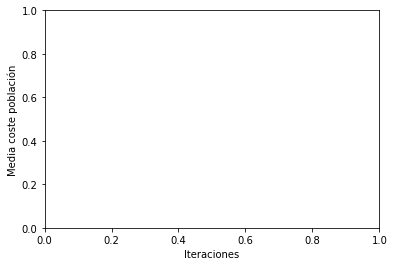

<Figure size 864x864 with 0 Axes>

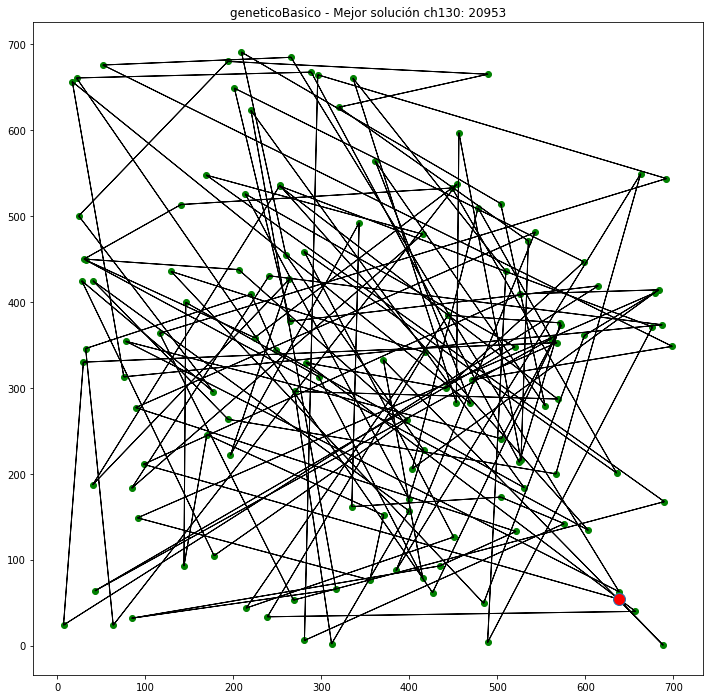

In [4]:
%matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(12,12)) 
ax.set_xlabel('Iteraciones') ; ax.set_ylabel('Media coste población')

algoritmo = "geneticoBasico"
print(algoritmo)
fichero = "ch130"
nodos = leeFichero(fichero)
distancias = getMDistancias(nodos)
    
print(f"\nFichero: {fichero}")

costes = []
it = []
mejorSolucion = []
mejorCoste = float('inf')

# Parámetros del algoritmo
num_nodos = len(nodos)    # Fichero
tam_poblacion = 60 # 30-100 individuos
k_torneo = round(0.3 * tam_poblacion) # Torneo selección, escogiendo k individuos aleatorios Presión/diversidad
tam_cruce = round(num_nodos * 0.95) # Num nodos a mantener del padre1 (Se mantiene mas del padre para no crear soluciones disruptivas)
prob_mutacion = 0.02 # Probabilidad de aplicar operador de mutación al hijo
tam_mutacion = round(num_nodos * 0.08) # Tamaño (num nodos) sublista a mutar 
sembrar_greedy = False # Plantar individuo solución algoritmo greedy
radio_nicho = num_nodos * 0.1 # Distancia hamming umbral para entrar al nicho
tam_nicho = 5 # Número de individuos que se mantienen por nicho (los mejores)
#########################



t = time.time()

poblacion = genetico_multimodal(semilla, num_nodos, distancias, tam_poblacion, k_torneo, tam_cruce, prob_mutacion, tam_mutacion, radio_nicho, tam_nicho, sembrar_greedy, fig, ax)
    
elapsed = time.time() - t
print("Tiempo de ejecución: %f\n" % elapsed )


mejorIndividuo = min(poblacion)
mejorSolucion = mejorIndividuo.camino
coste = mejorIndividuo.coste

print("-------- PARÁMETROS A. GENÉTICO ---------")
print("Sembrar greedy:\t", sembrar_greedy)
print("Tam población:\t", tam_poblacion)
print("k_torneo:\t", k_torneo)
print("Tam cruce:\t", tam_cruce)
print("Prob mutación:\t", prob_mutacion)
print("Tam mutación:\t", tam_mutacion)
print("Radio nicho:\t", radio_nicho)
print("Tamaño nicho (Kappa):\t", tam_nicho)
print("------------------------------------------")

print("----- COSTES SOLUCIONES -----")
for ind in poblacion:
    print(ind)


print("Mejor sol Coste: %s\t Semilla: %s" % (coste, semilla) ) 
titulo = algoritmo + " - Mejor solución " + fichero + ": " + str(coste)
pintaCamino(mejorSolucion, nodos, titulo)